In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [3]:
matplotlib.style.use('ggplot')
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['lines.linewidth'] = 3
matplotlib.rcParams['lines.markersize'] = 10

In [4]:
stats_path = 'rib_stats.csv'
df = pd.read_csv(stats_path)

In [5]:
from math import floor,log10
def format_func(value, tick_number=None):
    num_thousands = 0 if abs(value) < 1000 else floor (log10(abs(value))/3)
    value = round(value / 1000**num_thousands, 2)
    return f'{value:g}'+' KMGTPEZY'[num_thousands]

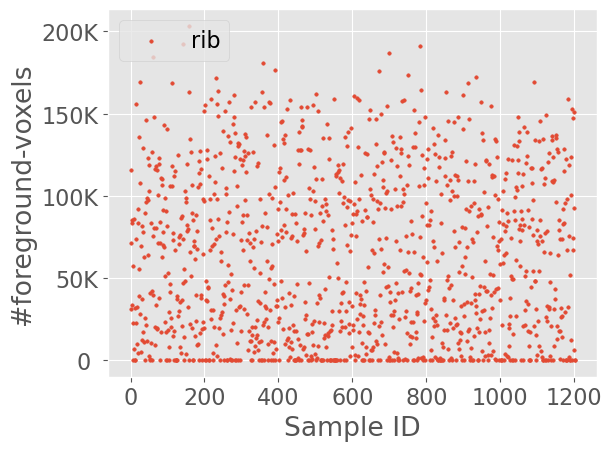

In [9]:

fig,ax = plt.subplots()
plt.scatter(x = range(len(df['total_voxels'])),y=df['total_voxels'],label='rib',s=6)
# plt.axhline(y=150000,linestyle='--',label='150k voxels',color='k')
plt.ylabel('#foreground-voxels')
plt.xlabel('Sample ID')
plt.legend(loc='upper left')
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
plt.tight_layout()
plt.savefig('totalsegmentator_rib_voxel_plot.pdf')

In [7]:
df_non_empty = df[df['total_voxels'] != 0]
df_non_empty['total_voxels'].count()

1070

In [8]:
df[df.transpose().all()]['total_voxels'].count()

481